<a href="https://colab.research.google.com/github/VladislavTumanov/bookish-computing-machine/blob/main/How_pop_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import requests
import io 
import seaborn as sns
import torch 
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
import scipy
from sklearn.model_selection import  StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [1]:
from google.colab import files
uploaded = files.upload()

Saving howpop_train.csv to howpop_train.csv


In [4]:
train_df = pd.read_csv(io.BytesIO(uploaded['howpop_train.csv']))

In [5]:
from google.colab import files
uploaded = files.upload()

Saving howpop_test.csv to howpop_test.csv


In [24]:
test_df = pd.read_csv(io.BytesIO(uploaded['howpop_test.csv']))

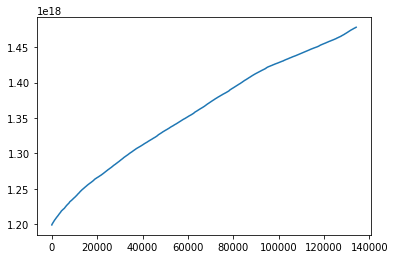

In [25]:
from pandas.core.tools.datetimes import to_datetime
train_df['published'].apply(lambda ts: pd.to_datetime(ts).value).plot() # sort by published

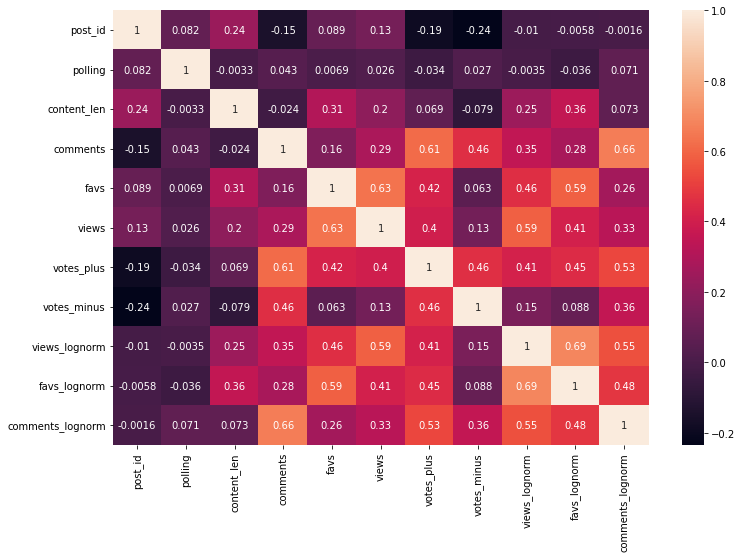

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot = True, ax = ax) #there are no too high correlation values (max = 0.69)

In [99]:
train_df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000,134137.000000,134137.000000,134137.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035,0.004849,0.003402,-0.003675
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282,1.002158,1.002778,1.005259
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,-6.615254,-4.137662,-4.161967
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000,-0.706552,-0.695780,-0.633775
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000,-0.020934,0.007022,0.072082
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000,0.682689,0.708778,0.697072
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000,5.182821,4.872866,3.900973


In [100]:
test_df.describe()

,post_id,content_len
count,3990.000000,3990.000000
mean,305836.804010,12539.878446
std,16148.256476,11603.377493
min,204496.000000,417.000000
25%,284234.500000,6183.500000
50%,315568.000000,9504.500000
75%,317979.500000,15243.500000
max,320472.000000,229420.000000


In [102]:
train_df.dtypes

url                  object
domain               object
post_id               int64
published            object
author               object
flow                 object
polling                bool
content_len           int64
title                object
comments              int64
favs                  int64
views                 int64
votes_plus          float64
votes_minus         float64
views_lognorm       float64
favs_lognorm        float64
comments_lognorm    float64
dtype: object

In [27]:
train_df['published'].value_counts()

2011-06-14 15:52:00    39
2008-09-19 10:58:00    30
2008-09-19 10:18:00    20
2010-02-25 21:52:00    16
2008-10-15 18:04:00     6
                       ..
2011-11-17 11:01:00     1
2011-11-17 09:28:00     1
2011-11-17 08:49:00     1
2011-11-17 04:42:00     1
2016-10-31 23:56:00     1
Name: published, Length: 130291, dtype: int64

In [28]:
Year_ = pd.DatetimeIndex(train_df['published']).year
Year_.value_counts() # most of all the publication in 2015 year

2015    23452
2016    16316
2014    16180
2012    15972
2013    15537
2011    15063
2010    13091
2009    10783
2008     7743
Name: published, dtype: int64

In [75]:
features = ['author', 'flow', 'domain','title']
train_size = int(0.7 * train_df.shape[0])

In [76]:
X, y = train_df.loc[:, features],  train_df['favs_lognorm'] 
X_test = test_df.loc[:, features]
X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:,:]
y_train, y_valid = y.iloc[:train_size], y.iloc[train_size:]

In [77]:
vectorizer_title = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 3))
X_train_title = vectorizer_title.fit_transform(X_train['title'])
X_valid_title = vectorizer_title.transform(X_valid['title'])
X_test_title = vectorizer_title.transform(X_test['title'])

In [79]:
X_train_title.shape

(93895, 50624)

In [80]:
vectorizer_title_ch = TfidfVectorizer(analyzer='char')
X_train_title_ch = vectorizer_title_ch.fit_transform(X_train['title'])
X_valid_title_ch = vectorizer_title_ch.transform(X_valid['title'])
X_test_title_ch = vectorizer_title_ch.transform(X_test['title'])

In [81]:
X_train_title_ch.shape

(93895, 218)

In [82]:
feats = ['author', 'flow', 'domain']
X_train[feats][:5].fillna('-').T.to_dict().values()

dict_values([{'author': '@Tapac', 'flow': 'develop', 'domain': 'habrahabr.ru'}, {'author': '@DezmASter', 'flow': 'design', 'domain': 'habrahabr.ru'}, {'author': '@DezmASter', 'flow': 'design', 'domain': 'habrahabr.ru'}, {'author': '@Taoorus', 'flow': 'design', 'domain': 'habrahabr.ru'}, {'author': '@dennydo', 'flow': '-', 'domain': 'geektimes.ru'}])

In [83]:
dict_vect = DictVectorizer()
dict_vect_matrix = dict_vect.fit_transform(X_train[feats][:5].fillna('-').T.to_dict().values())
dict_vect_matrix

<5x9 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [84]:
dict_vect_matrix.toarray()

array([[0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0.]])

In [85]:
dict_vect.feature_names_

['author=@DezmASter',
 'author=@Taoorus',
 'author=@Tapac',
 'author=@dennydo',
 'domain=geektimes.ru',
 'domain=habrahabr.ru',
 'flow=-',
 'flow=design',
 'flow=develop']

In [86]:
for col in feats:
    print(col,len(X_train[col][:5].fillna('-').unique()))

author 4
flow 3
domain 2


In [87]:
vectorizer_feats = DictVectorizer()
X_train_feats = vectorizer_feats.fit_transform(X_train.loc[:, feats].fillna('-').T.to_dict().values())
X_valid_feats = vectorizer_feats.transform(X_valid.loc[:, feats].fillna('-').T.to_dict().values())
X_test_feats = vectorizer_feats.transform(X_test.loc[:, feats].fillna('-').T.to_dict().values())

In [88]:
X_train_feats.shape

(93895, 17869)

In [89]:
X_train_new = scipy.sparse.hstack([X_train_title, X_train_feats, X_train_title_ch])
X_valid_new = scipy.sparse.hstack([X_valid_title, X_valid_feats, X_valid_title_ch])
X_test_new =  scipy.sparse.hstack([X_test_title, X_test_feats, X_test_title_ch])

In [92]:
model1 = Ridge(random_state=1)
model1.fit(X_train_new, y_train)

Ridge(random_state=1)

In [94]:
params2 = {'alpha':[0.01,0.1,1,5,10]}
gr2 = GridSearchCV(model1, params2, n_jobs = -1)
gr2.fit(X_train_new, y_train)
print(gr2.best_score_,'\n', gr2.best_estimator_)

0.34156548597848857 
 Ridge(alpha=5, random_state=1)


In [95]:
model_best = Ridge(alpha = 5, random_state=1)
model_best.fit(X_train_new, y_train)

Ridge(alpha=5, random_state=1)

In [96]:
train_preds1 = model_best.predict(X_train_new)
valid_preds1 = model_best.predict(X_valid_new)

print('Ошибка на трейне',mean_squared_error(y_train, train_preds1))
print('Ошибка на тесте',mean_squared_error(y_valid, valid_preds1))

Ошибка на трейне 0.4321617348080462
Ошибка на тесте 0.6878448601394056
